In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report
from datetime import datetime
import plotly.express as px
import warnings

**Цель**: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

**Описание задания**:

Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

**Этапы работы**:

1. Преобразуйте данные:
    
    a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
    
    b. закодируйте категориальные переменные числовыми значениями по необходимости.
    
    
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

9. **Сформулируйте выводы по проделанной работе**:
    
    a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

    b. *может ли ROC-кривая проходить ниже диагонали?

**Результат**:

- проведена оценка качества модели классификации;

- реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

**Форма выполнения**:
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

**Инструменты**:
- Jupyter Notebook/Google Colab
- GitHub
- файл athletes.csv
- Срок выполнения: дедлайн приема решений на проверку

***Рекомендации к выполнению**:
- Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).

- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.

- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.

- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [ ]:
warnings.filterwarnings('ignore')


# 1. Преобразуйте данные: 

### a. Преобразуйте/удалите пропуски по необходимости;
### b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [ ]:
path = 'athletes.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
df['dob'] = pd.to_datetime(df.dob, format='%m/%d/%y')

In [ ]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ['object']]
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11538 non-null  int64         
 1   name         11538 non-null  category      
 2   nationality  11538 non-null  category      
 3   sex          11538 non-null  category      
 4   dob          11537 non-null  datetime64[ns]
 5   height       11208 non-null  float64       
 6   weight       10879 non-null  float64       
 7   sport        11538 non-null  category      
 8   gold         11538 non-null  int64         
 9   silver       11538 non-null  int64         
 10  bronze       11538 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(2), int64(4)
memory usage: 1.0 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,11538.0,4.999885e+08,2.908648e+08,18347.00,2.450997e+08,5.002011e+08,7.539874e+08,9.999878e+08
height,11208.0,1.766282e+00,1.127187e-01,1.21,1.690000e+00,1.760000e+00,1.840000e+00,2.210000e+00
weight,10879.0,7.206820e+01,1.617733e+01,31.00,6.000000e+01,7.000000e+01,8.100000e+01,1.700000e+02
gold,11538.0,5.772231e-02,2.559099e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
silver,11538.0,5.676894e-02,2.391471e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
bronze,11538.0,6.101577e-02,2.433202e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [ ]:
print(f'В данных встречаются дубликаты {df.duplicated().sum()} раз.')

В данных встречаются дубликаты 0 раз.


### 1.1. Работа с пропусками в данных

In [ ]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [ ]:
print(f'Для date of birth пустых строк { len(df[ df.dob.isna()])}')
print(f'Для height пустых строк { len(df[ df.height.isna()])}')
print(f'Для weight пустых строк { len(df[ df.weight.isna()])}')
print(f'Всего строк в наборе {df.shape[0]}')

Для date of birth пустых строк 1
Для height пустых строк 330
Для weight пустых строк 659
Всего строк в наборе 11538


**Date of birth**

In [ ]:
# Видим, что для одной записи у нас отсутствует дата рождения. Эту запись исключим из обучения модели.
df[df['dob'].isna()==1]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaT,NaN,NaN,sailing,0,0,0


In [ ]:
df = df[df['dob'].isna() != 1]

**Height & Weight**

In [ ]:
# Заполним пропущенные значения медианой в разрезе пола и вида спорта.
df.height = df.height.fillna(df.groupby(['sex', 'sport'])['height'].transform('median'))
df.weight = df.weight.fillna(df.groupby(['sex', 'sport'])['weight'].transform('median'))

In [ ]:
df[['height', 'weight']].isna().sum()

height      0
weight    286
dtype: int64

In [ ]:
print('Видим, что пропуски остались толкьо в категории спорта {}'.format(df[df.weight.isna()]['sport'].unique()[0]))

Видим, что пропуски остались толкьо в категории спорта boxing


In [ ]:
# Заменим оставшиеся пропуски медианным значением в разрезе пола и роста спортсменов

In [ ]:
df.weight = df.weight.fillna(df.groupby(['sex', 'height'])['weight'].transform('median'))

**Посмотрим на данные после обработки пропусков**

In [ ]:
df.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

**Работа с DateTime** 

In [ ]:
def calculate_age(birthdate):
    
    """ Функция позволяет по дате рождения рассчитать возраст спортсмена"""
    
    age = datetime.now().year - birthdate.year  - (datetime.now().month < birthdate.month)
    return age

In [ ]:
df['age'] = df['dob'].apply(calculate_age)


In [ ]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,53
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,36
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,30
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,31
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,32


In [ ]:
df[df['age'] < 0 ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
32,189886442,Abdelkebir Ouaddar,MAR,male,2062-07-15,1.74,67.0,equestrian,0,0,0,-40
55,969824503,Abdullah Alrashidi,IOA,male,2063-08-21,1.83,84.0,shooting,0,0,1,-41
1376,128263534,Beatriz Ferrer-Salat,ESP,female,2066-03-11,1.76,58.0,equestrian,0,0,0,-44
1446,951599589,Bernadette Pujals,MEX,female,2068-06-08,1.58,55.0,equestrian,0,0,0,-46
1746,48374531,Carl Hester,GBR,male,2067-06-29,1.82,86.0,equestrian,0,1,0,-45


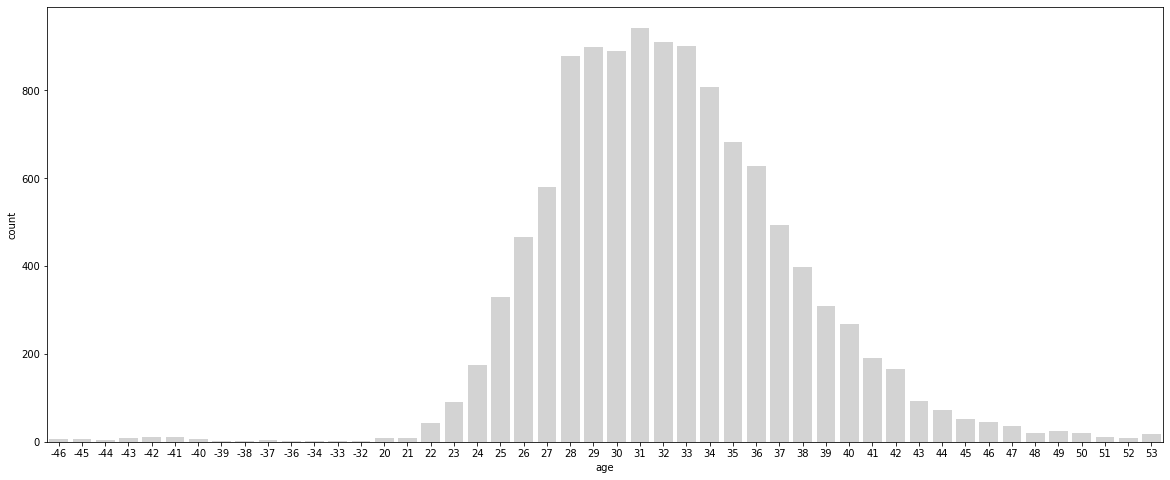

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='age', color='lightgrey')
plt.show()

**Вывод**: видим, что в данных есть ошибки, некоторые даты рождения спортсменов указаны в будущем. Исключим такие записи из датасета.

In [ ]:
# Оставляем участников от 18 лет
df = df[df.age >= 18]

**Подготовка данных для построения модели** 

In [ ]:
# Список всех полей датасета
[col for col in df.columns]

['id',
 'name',
 'nationality',
 'sex',
 'dob',
 'height',
 'weight',
 'sport',
 'gold',
 'silver',
 'bronze',
 'age']

In [ ]:
# Выделим признаки и ответы
X, y = df[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']], df['sex']

**Замечание**: id и имя участников исключил из модели, т.к. это технические признаки и не влияют на предективную способность модели.

### 1.2. закодируйте категориальные переменные числовыми значениями по необходимости.

In [ ]:
# Кодировку признаков можно произвести до разбиения данных на трейн и тест, а скейлинг необходимо проводить после.
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2 Разделение выборки на обучающую (80% данных) и тестовую (20% данных) подмножества.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.1 Стандартизация данных

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 2.2 Построение модели

In [ ]:
# Строим модель
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_probs = lr.predict_proba(X_test)
lr.score(X_test, y_test)

0.8466230936819172

# 3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

Прежде, чем строить ROC-кривую посмотрим на classification_report и матрицу ошибок:

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1033
           1       0.86      0.87      0.86      1262

    accuracy                           0.85      2295
   macro avg       0.85      0.84      0.84      2295
weighted avg       0.85      0.85      0.85      2295



Confusion Matrix:


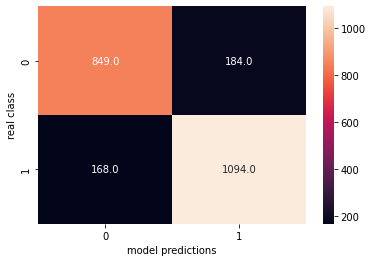

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt=".1f")
plt.xlabel('model predictions')
plt.ylabel('real class')
print('Confusion Matrix:')
plt.show()

In [ ]:
y_probs = y_pred_probs[:,1]

In [ ]:
fpr, tpr, tresholds = roc_curve(y_test,y_probs)

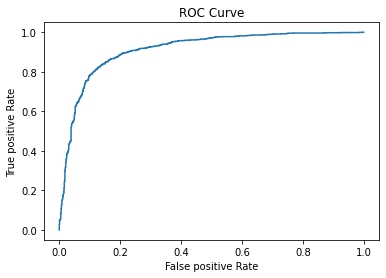

In [ ]:
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

plt.show()

# 4. Вычисление значения ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [ ]:
# Area Under Curve
roc_auc = roc_auc_score(y_test, y_probs)
roc_auc

0.9119684331482626

# 5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [ ]:
# Предсказанная моделью вероятность первого класса.
y_pred_proba = lr.predict_proba(X_test)[:, 1]

In [ ]:
pd.DataFrame({'y_test':y_test, 'y_pred_proba':y_pred_proba}).head()

,y_test,y_pred_proba
0,1,0.959041
1,0,0.155196
2,0,0.019630
3,1,0.690934
4,0,0.061172


In [ ]:
def get_params(y_test, y_pred_proba, threshold=0.5):
    tp, tn, fp, fn = (0, 0, 0, 0)
    for i in range(len(y_test)):
        prediction = y_pred_proba[i]
       
        if prediction > threshold:
            pred_calss = 1
        else:
            pred_calss = 0

        if (y_test[i] == 1) and pred_calss == 1:
            tp += 1
        elif y_test[i] == 0 and pred_calss == 0:
            tn += 1    
        elif y_test[i] == 0 and pred_calss == 1:
            fp += 1 
        else:
            fn += 1
        
    return tp, tn, fp, fn

In [ ]:
# Показатели рассчитанные вручную обозначаю с нижнем подчеркиванием, чтобы отлчить от рассчитанных с помощью skit-learn
tp_, tn_, fp_, fn_ = get_params(y_test, y_pred_proba)
print(f'tp = {tp_}, tn = {tn_}, fp = {fp_}, fn = {fn_};')    


tp = 1094, tn = 849, fp = 184, fn = 168;


In [ ]:
tpr_ = tp_ / (tp_ + fn_)
fpr_ = fp_ / (tn_ + fp_)

print(f'True Positive Rate  (TPR): {round(tpr_, 3)}')
print(f'False Positive Rate (FPR): {round(fpr_, 3)}') 

True Positive Rate  (TPR): 0.867
False Positive Rate (FPR): 0.178


**Примечание:** 

* TPR показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.
* FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно.

# 6 Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

Воспользуемся вышеописанной логикой и напишем свою собственную функцию, которая рассчитает TPR, FPR для каждого заданного порога

In [ ]:
TPR_ = []
FPR_ = []
PREC_ = []
treshold_ = [] 
thresholds = np.arange(0, 1, 0.01)
# tresholds = np.linspace(0, 1, 50) 

for threshold in thresholds:
    tp_, tn_, fp_, fn_ = get_params(y_test, y_pred_proba, threshold)
    
    tpr_ = tp_ / (tp_ + fn_)
    fpr_ = fp_ / (tn_ + fp_)
    precision_ = tp_ / (tp_ + fp_) # Добавил очень маленькую величину, чтобы избежать деления на 0.
    
    TPR_.append(tpr_)
    FPR_.append(fpr_)
    PREC_.append(precision_)
    treshold_.append(threshold)   

In [ ]:
pd.DataFrame({'threshold': thresholds, 'TRP':TPR_, 'FPR':FPR_, 'PREC':PREC_})


,threshold,TRP,FPR,PREC
0,0.00,1.000000,1.000000,0.549891
1,0.01,0.998415,0.957406,0.560249
2,0.02,0.997623,0.905131,0.573838
3,0.03,0.996038,0.856728,0.586835
4,0.04,0.996038,0.816070,0.598571
...,...,...,...,...
95,0.95,0.351823,0.022265,0.950749
96,0.96,0.311410,0.019361,0.951574
97,0.97,0.263074,0.018393,0.945869
98,0.98,0.201268,0.015489,0.940741


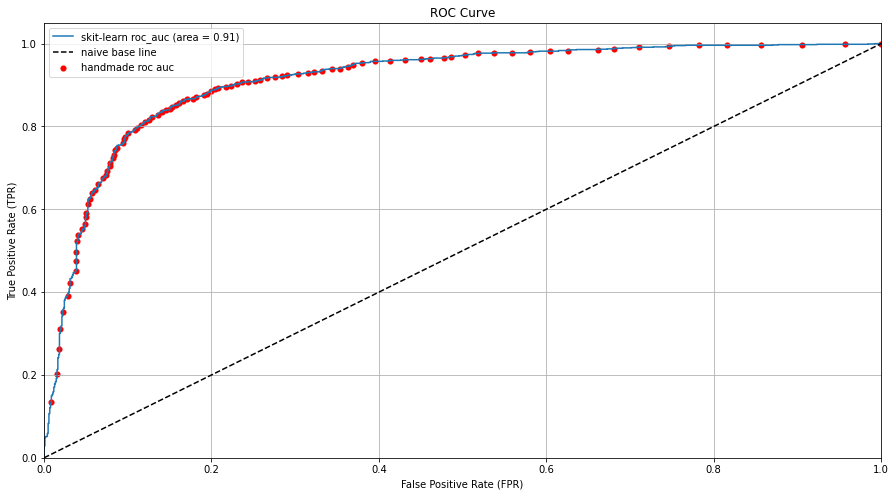

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8)) # fig.set_size_inches(10, 5)
ax.scatter(FPR_, TPR_, linewidths=0.1, label='handmade roc auc', color='red')
ax.plot(fpr, tpr, label='skit-learn roc_auc (area = %.2f)'% roc_auc)
ax.plot([0, 1], color='black', linestyle='--', label='naive base line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
ax.grid()
ax.legend()
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
plt.show()

Вывод: 

* Самописная ROC кривая точно воспроизводит траекторию оригинальной функции из библиотеки skit-learn roc_curve(). При этом в самописной реализации я использовал меньше поргов разбиения (100 точек), поэтому точки имеют меньшую плотность по сравнению с оригинальным графиком.

* Чем больше площадь под кривой (AUC), тем лучше классификация. Наилучшая линия — это вертикальная линия от (0,0) до (0,1), которая тянется до (1,1). 

* Черная пунктирная линия показывает кривую TPR и FPR при случайном определении positive или negative для каждого случая. Для этой диагональной линии площадь под кривой (AUC) составляет 0.5.

* Линия проходит значительно выше, чем случайный классификатор с одинаковым количеством TP и FP, что свидетельствует о высоком качестве алгоритма.

* Функция roc_curve требует только вероятность для положительного случая и устойчива к несбалансированным классам.

* У модели хороший показатель классификации ROC_AUC_SCORE = 0.91



# 7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

In [ ]:
precision, recall, tresholds = precision_recall_curve(y_test, y_pred_proba)

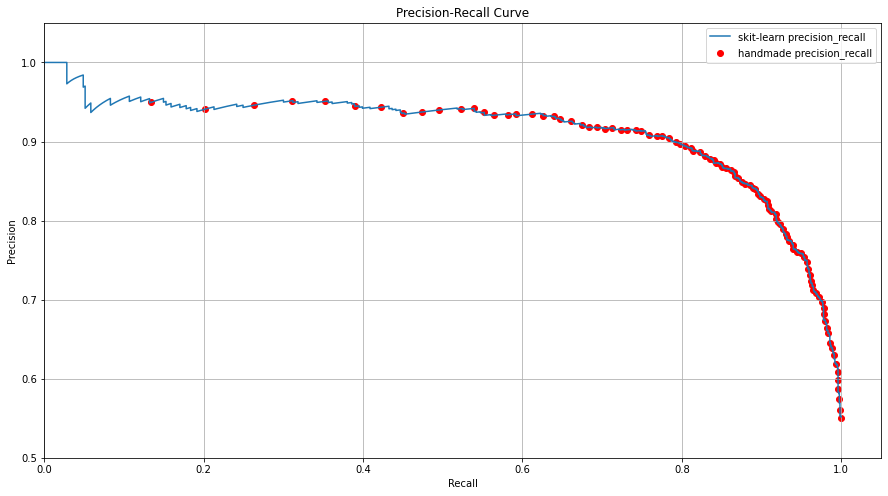

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8)) # fig.set_size_inches(10, 5)
ax.plot(recall, precision, label='skit-learn precision_recall')
ax.scatter(TPR_, PREC_, label='handmade precision_recall', color='red')
plt.xlim([0.0, 1.05])
plt.ylim([0.5, 1.05])
ax.grid()
ax.legend()
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()

Интерактивная реализация графика Precision Recal Curve с помощью библиотеки plotly

In [ ]:
df_prec_recall = pd.DataFrame({'precision':PREC_, 'recall':TPR_,'threshold': thresholds})
df_prec_recall.head()

,precision,recall,threshold
0,0.549891,1.000000,0.00
1,0.560249,0.998415,0.01
2,0.573838,0.997623,0.02
3,0.586835,0.996038,0.03
4,0.598571,0.996038,0.04


In [ ]:
plt.figure(figsize=(10, 8))
def plot_interactive_precision_recall_curve(df, precision, recall, thresholds):
    fig = px.area(
        data_frame=df, 
        x=recall, 
        y=precision,
        hover_data=thresholds, 
        title='Precision-Recall Curve'
    )
    fig.update_layout(
        autosize=False,
        width=900,
        height=650,
        margin=dict(l=30, r=30, b=30, t=30, pad=4),
        title_x=.5, # Центр заголовка
        hovermode = 'closest',
        xaxis=dict(hoverformat='.4f'),
        yaxis=dict(hoverformat='.4f')
    )
    hovertemplate = 'Recall=%{x}<br>Precision=%{y}<br>Threshold=%{customdata[0]:.4f}<extra></extra>'
    fig.update_traces(hovertemplate=hovertemplate)
    
    # Добавляю пунктирную линию
    fig.add_shape(type='line', line=dict(dash='dash'), x0=0.1, y0=1, x1=1, y1=0)

    fig.show()

<Figure size 720x576 with 0 Axes>

In [ ]:
plot_interactive_precision_recall_curve(df=df_prec_recall, 
                           precision='precision', 
                           recall='recall', 
                           thresholds=['threshold'])
plt.show()

# 8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [ ]:
df_roc_auc = pd.DataFrame({'TRP':TPR_,'FPR':FPR_, 'threshold': thresholds})
df_roc_auc

,TRP,FPR,threshold
0,1.000000,1.000000,0.00
1,0.998415,0.957406,0.01
2,0.997623,0.905131,0.02
3,0.996038,0.856728,0.03
4,0.996038,0.816070,0.04
...,...,...,...
95,0.351823,0.022265,0.95
96,0.311410,0.019361,0.96
97,0.263074,0.018393,0.97
98,0.201268,0.015489,0.98


In [ ]:
auc_score = abs(np.trapz(df_roc_auc.TRP, df_roc_auc.FPR))
auc_score

0.9112995399057721